Name : Tejaswini Gokanakonda

Roll No : DE142

Date : 16-11-2024

**Loading and Preview the Dataset**

In [9]:
import pandas as pd
df = pd.read_csv("Downloads/population_malaysia.csv")
df.head()
print(df)

             date   sex      age         ethnicity  population
0      1970-01-01  both  overall           overall     10881.8
1      1970-01-01  both      0-4           overall      1702.4
2      1970-01-01  both      5-9           overall      1690.3
3      1970-01-01  both    10-14           overall      1454.7
4      1970-01-01  both    15-19           overall      1197.6
...           ...   ...      ...               ...         ...
17011  2024-01-01  male      85+        bumi_other        10.0
17012  2024-01-01  male      85+           chinese        14.9
17013  2024-01-01  male      85+            indian         4.4
17014  2024-01-01  male      85+     other_citizen         0.6
17015  2024-01-01  male      85+  other_noncitizen        11.7

[17016 rows x 5 columns]


Explanation: This is a heading introducing the section for loading and previewing the dataset. It sets the context for the next steps.

Output: Displays the first few rows of the dataset and prints the entire dataset (truncated for display).

Explanation:

**import pandas as pd**: Imports the Pandas library for data manipulation.

**pd.read_csv**: Loads a CSV file located at Downloads/population_malaysia.csv into a DataFrame called df.

**df.head()**: Displays the first 5 rows of the DataFrame for a quick preview.

**print(df)**: Prints the entire DataFrame. Useful for confirming the dataset structure but may overwhelm the output if the dataset is large.


**Basic Dataset Information**

In [10]:
display(data.head())
display(data.tail())

,date,sex,age,ethnicity,population
0,1970-01-01,both,overall,overall,10881.8
1,1970-01-01,both,0-4,overall,1702.4
2,1970-01-01,both,5-9,overall,1690.3
3,1970-01-01,both,10-14,overall,1454.7
4,1970-01-01,both,15-19,overall,1197.6


,date,sex,age,ethnicity,population
17011,2024-01-01,male,85+,bumi_other,10.0
17012,2024-01-01,male,85+,chinese,14.9
17013,2024-01-01,male,85+,indian,4.4
17014,2024-01-01,male,85+,other_citizen,0.6
17015,2024-01-01,male,85+,other_noncitizen,11.7


Explanation: A heading that introduces the next section, focusing on extracting basic details from the dataset.

Output: No output present in this summary.

Explanation:

**display(data.head())**: Displays the first few rows of the data DataFrame.

**display(data.tail())**: Displays the last few rows of the data DataFrame.

Note: The variable data appears undefined at this stage. It might cause an error unless previously initialized.

In [11]:
print(df.size)

85080


Explanation:

**df.size**: Returns the total number of elements (rows × columns) in the DataFrame.

**print**: Prints the size of the DataFrame. The output indicates that the dataset contains 85,080 elements.

In [32]:
print(df.columns)

Index(['date', 'sex', 'age', 'ethnicity', 'population', 'Year'], dtype='object')


Explanation:

**df.columns**: Outputs the names of all the columns in the DataFrame. Useful for verifying column names and ensuring consistency with subsequent code

In [12]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

df.info()

df.describe()

Dataset has 17016 rows and 5 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17016 entries, 0 to 17015
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        17016 non-null  object 
 1   sex         17016 non-null  object 
 2   age         17016 non-null  object 
 3   ethnicity   17016 non-null  object 
 4   population  17016 non-null  float64
dtypes: float64(1), object(4)
memory usage: 664.8+ KB


,population
count,17016.000000
mean,542.242096
std,1863.186659
min,0.200000
25%,24.200000
50%,111.250000
75%,390.650000
max,34058.800000


Explanation:

**df.info()**: Displays a concise summary of the DataFrame, including: Column names and their data types.
    
Non-null value counts for each column.
    
Memory usage of the DataFrame.
    
**df.describe()**: Generates descriptive statistics for numerical columns, such as: Count, mean, standard deviation, min, max, and quartile values.
    
It helps in understanding the range and distribution of numerical data.

**Data Cleaning**

**Check for Missing Values:**

In [13]:
df.isnull().sum()

date          0
sex           0
age           0
ethnicity     0
population    0
dtype: int64

Explanation

**df.isnull()**:

Checks each element of the DataFrame for missing values (NaN).

Returns a DataFrame of the same shape as df, with True for missing values and False for non-missing values.

**Fill or Drop Missing Values:**

In [14]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna("Not Available", inplace=True)

Explanation : 

**df.mean(numeric_only=True)**: Calculates the mean (average) of each numeric column in the DataFrame.

The parameter numeric_only=True ensures that only numeric columns are considered when calculating the mean, ignoring non-numeric columns.

**df.fillna(...):** Replaces all NaN values in the DataFrame with the values specified.

Here, missing values in numeric columns are replaced with their respective column means.

**inplace=True:**

Ensures the operation is performed directly on the original DataFrame (df) without returning a new object.

**Identifying and Handling Duplicates:**

In [15]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


Explanation :

df.duplicated(): Checks for duplicate rows in the DataFrame.
    
Returns a boolean Series where:

True indicates the row is a duplicate.
    
False indicates the row is unique.

df.drop_duplicates():

Removes duplicate rows from the DataFrame.

**Converting Dates to Appropriate Format:**

In [16]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

Explanation: 

pd.to_datetime(df['date']):

Converts the 'date' column to a datetime object, enabling easier handling of dates (e.g., extracting year, month, day).

errors='coerce':

Ensures that any invalid date entries (e.g., improperly formatted strings or null values) are converted to NaT (Not a Time), representing missing or invalid datetime values.

**Exploratory Data Analysis (EDA)**

In [17]:
for column in df.select_dtypes(include='object').columns:
    print(f"Unique values in {column}:", df[column].unique())

Unique values in sex: ['both' 'female' 'male']
Unique values in age: ['overall' '0-4' '5-9' '10-14' '15-19' '20-24' '25-29' '30-34' '35-39'
 '40-44' '45-49' '50-54' '55-59' '60-64' '65-69' '70+' '70-74' '75-79'
 '80+' '80-84' '85+']
Unique values in ethnicity: ['overall' 'bumi' 'chinese' 'indian' 'other' 'bumi_malay' 'bumi_other'
 'other_citizen' 'other_noncitizen']


Explanation : 

df.select_dtypes(include='object'): Selects all columns in the DataFrame with data type object (typically used for string/text data).
                                                                                                
.columns: Retrieves the column names of the selected object columns.

for column in ...: Iterates over each column name in the object type columns.
    
df[column].unique(): Extracts the unique values in the current column.
    
print(f"..."): Displays the column name and its unique values.

**Summary Statistics**

In [18]:
df.describe(include='all')

,date,sex,age,ethnicity,population
count,17016,17016,17016,17016,17016.000000
unique,NaN,3,21,9,NaN
top,NaN,both,overall,overall,NaN
freq,NaN,5672,909,3012,NaN
mean,2002-08-23 07:52:58.561354112,NaN,NaN,NaN,542.242096
min,1970-01-01 00:00:00,NaN,NaN,NaN,0.200000
25%,1993-01-01 00:00:00,NaN,NaN,NaN,24.200000
50%,2003-01-01 00:00:00,NaN,NaN,NaN,111.250000
75%,2014-01-01 00:00:00,NaN,NaN,NaN,390.650000
max,2024-01-01 00:00:00,NaN,NaN,NaN,34058.800000


Explanation : 

df.describe(): Generates summary statistics of the DataFrame, providing insights into each column's distribution.

include='all': Extends the summary to include all columns, not just numeric ones.

**Distributions and Value Counts**

In [19]:
for column in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {column}:\n", df[column].value_counts())


Value counts for sex:
 sex
both      5672
female    5672
male      5672
Name: count, dtype: int64

Value counts for age:
 age
overall    909
35-39      909
65-69      909
60-64      909
55-59      909
50-54      909
0-4        909
40-44      909
45-49      909
30-34      909
25-29      909
20-24      909
15-19      909
10-14      909
5-9        909
70-74      879
75-79      879
80-84      714
85+        714
80+        165
70+         30
Name: count, dtype: int64

Value counts for ethnicity:
 ethnicity
overall             3012
chinese             2532
indian              2532
bumi_malay          1938
bumi_other          1938
other_citizen       1938
other_noncitizen    1938
bumi                 594
other                594
Name: count, dtype: int64


Explanation : 

df.select_dtypes(include='object').columns: Selects columns with the data type 'object' (usually strings).

for column in ...: Loops through each of those columns.

df[column].value_counts(): Gets the count of unique values in the column.
    
print(f"\nValue counts for {column}:\n", ...): Prints the value counts for each column with a label indicating which column is being shown.

**Data Distribution Visualization**

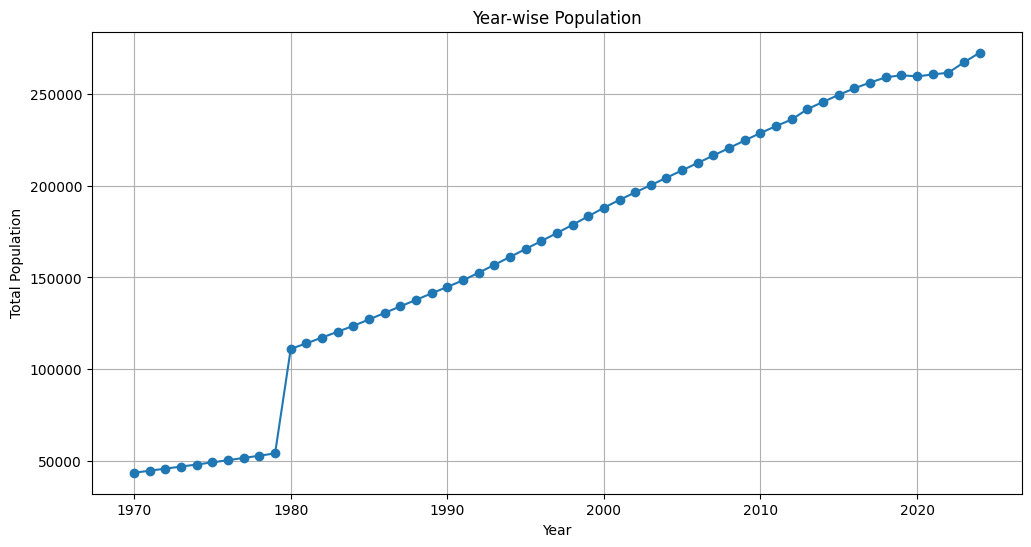

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year
df['Year'] = df['date'].dt.year

# Group by 'Year' and calculate total population
yearly_population = df.groupby('Year')['population'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(yearly_population['Year'], yearly_population['population'], marker='o', linestyle='-')
plt.title('Year-wise Population')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.grid(True)
plt.show()


Explanation : The code converts the 'date' column to datetime, extracts the year, groups the data by year to sum the population, 

and then plots the total population for each year using a line plot.

**Population Distribution by Age Group 1970 ans 2023**

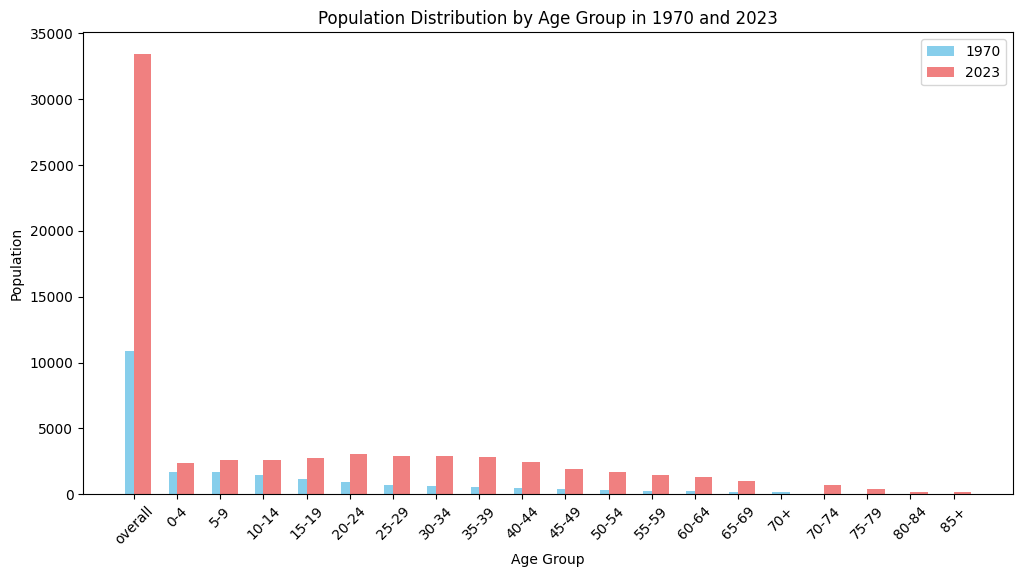

In [25]:
df_1970 = df[df['Year'] == 1970]
df_2023 = df[df['Year'] == 2023]

plt.figure(figsize=(12, 6))

plt.bar(df_1970['age'], df_1970['population'], width=0.4, label='1970', color='skyblue', align='center')

plt.bar(df_2023['age'], df_2023['population'], width=0.4, label='2023', color='lightcoral', align='edge')

plt.title('Population Distribution by Age Group in 1970 and 2023')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.legend()

plt.show()

Explanation : 

The code filters the data for the years 1970 and 2023, then creates a bar chart comparing population distributions by age group 

for both years using different colors and alignment for each.








**Male vs Female population 1970 to 2024**

<Figure size 1000x600 with 0 Axes>

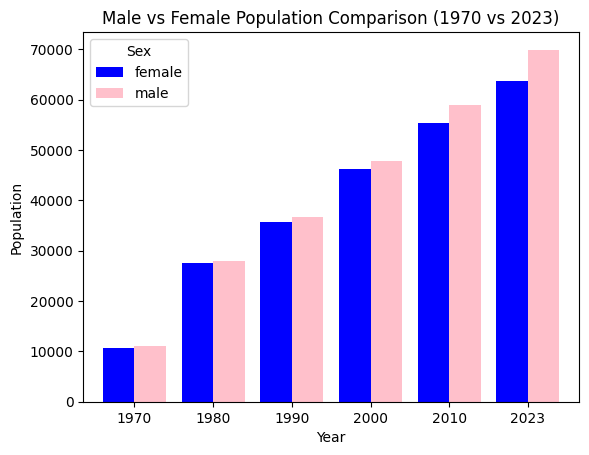

In [26]:
df_filtered = df[df['Year'].isin([1970,1980, 1990, 2000, 2010, 2023]) & df['sex'].isin(['male', 'female'])]

df_pivot = df_filtered.pivot_table(index='Year', columns='sex', values='population', aggfunc='sum')

plt.figure(figsize=(10, 6))
df_pivot.plot(kind='bar', color=['blue', 'pink'], width=0.8)

plt.title('Male vs Female Population Comparison (1970 vs 2023)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=0)
plt.legend(title='Sex')

plt.show()

Explanation : 

The code filters the DataFrame for specific years and sexes, then creates a pivot table summarizing the population by sex for each year. 

It generates a bar chart comparing the male and female populations for the selected years, with different colors for each sex.








**Data Transformation**

**Creating Additional Columns (e.g., extracting year from a date column):**

In [27]:
df['Year'] = df['date'].dt.year
print(df.head())

        date   sex      age ethnicity  population  Year
0 1970-01-01  both  overall   overall     10881.8  1970
1 1970-01-01  both      0-4   overall      1702.4  1970
2 1970-01-01  both      5-9   overall      1690.3  1970
3 1970-01-01  both    10-14   overall      1454.7  1970
4 1970-01-01  both    15-19   overall      1197.6  1970


Explanation : 

df['Year'] = df['date'].dt.year: This line extracts the year part from the 'date' column (which is assumed to be in datetime format) 

and stores it in a new column called 'Year'.

print(df.head()): This prints the first five rows of the updated DataFrame, allowing you to quickly check the data after the new 

'Year' column has been added.

**Sorting by date descending order**

In [28]:
df_sorted = df.sort_values(by='date', ascending=False)
print(df_sorted.head())

            date     sex      age         ethnicity  population  Year
17015 2024-01-01    male      85+  other_noncitizen        11.7  2024
16753 2024-01-01  female  overall           chinese      3371.3  2024
16743 2024-01-01    both      85+           overall       146.7  2024
16744 2024-01-01    both      85+        bumi_malay        69.5  2024
16745 2024-01-01    both      85+        bumi_other        18.9  2024


Explanation : 

df.sort_values(by='date', ascending=False): This line sorts the DataFrame df by the 'date' column in descending order (ascending=False).

df_sorted = ...: The sorted DataFrame is stored in the variable df_sorted.

print(df_sorted.head()): This prints the first five rows of the sorted DataFrame to verify the sorting.